In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist



(1200, 1173, 3)

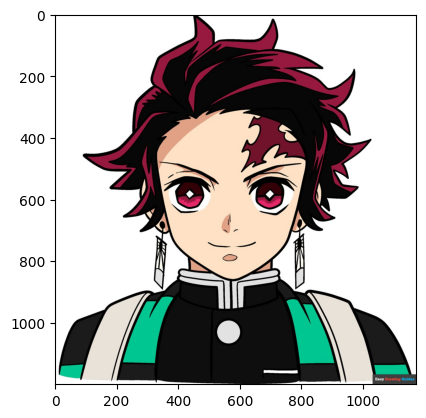

In [3]:
image = imread(os.path.join("Tanjiro-image.jpg"))
plt.imshow(image)
image.shape

In [4]:
X = image.reshape(-1, 3)
X.shape

(1407600, 3)

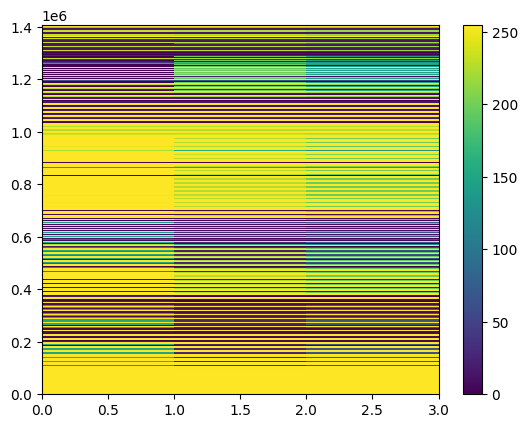

In [5]:
plt.pcolormesh(X)
plt.colorbar()

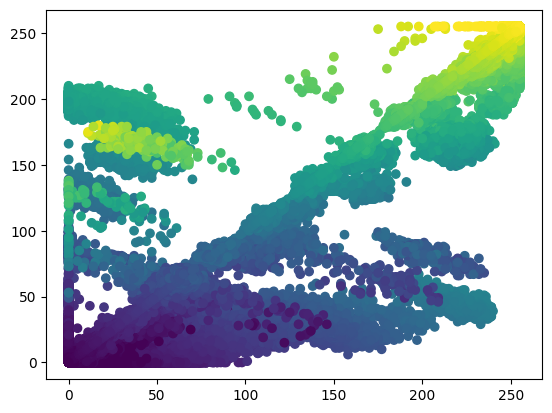

In [6]:
plt.scatter(X[:,0], X[:,1], c=X[:,2])
plt.show()

- Hacer una matriz N x 5 dimensiones, donde una columna es R, otra G, otra B, y las otras dos  los ejes X y Y. Donde N es 1200x1173.

In [7]:
h, w, _ = image.shape

vr = np.linspace(0, h, h, endpoint=False)
vc = np.linspace(0, w, w, endpoint=False)
Xc = np.kron(np.ones((h,1)), vc.reshape(-1,1))
Xr = np.kron(vr.reshape(-1,1), np.ones((1,w)))
Xc =Xc.reshape(-1)
Xr = Xr.reshape(-1)
X_kron = np.c_[X, Xc, Xr]
X_kron.shape

(1407600, 5)

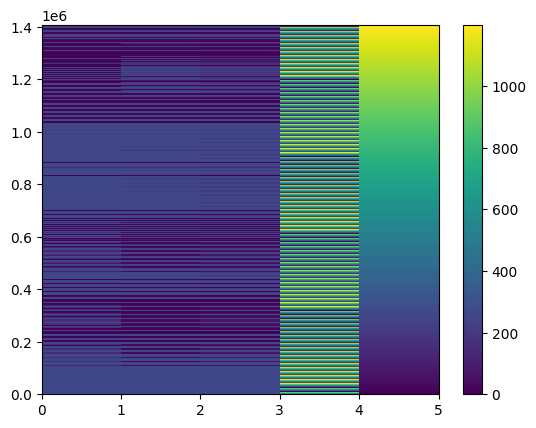

In [8]:
plt.pcolormesh(X_kron)
plt.colorbar()

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_kron)

In [10]:
k      = 4
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_train)

center = kmeans.cluster_centers_

distances = cdist(X_train, center, metric='euclidean')

indices = np.argmin(distances, axis=0)

print(indices)


[ 680978 1166734  422914 1209963]


In [11]:
X_new = X_kron[indices]
Xs = X_new[y_pred-1]
Xs.shape


(1407600, 5)